 # UNAD 

 ## Hector Julio Hernandez Marin

 ### prediccion de Arboles de Decisión

## Pasos de la Actividad

#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

#### 4. Dividir el dataset en Train y Test para evaluar correctamente el 3 modelo. 5. Entrenar el modelo configurando los diferentes hiperparámetros. 

#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

#### 7. Interpretar, analizar y documentar los resultados obtenidos.

####  Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/




# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [45]:
# Importamos la librería pandas para el manejo de datos en estructuras tipo DataFrame
import pandas as pd

# Importamos la librería numpy para realizar operaciones numéricas y trabajar con arreglos
import numpy as np

# Importamos seaborn para crear visualizaciones estadísticas atractivas y fáciles de usar
import seaborn as sns

# Importamos matplotlib.pyplot para crear gráficos y visualizaciones en general
import matplotlib.pyplot as plt

# Importamos la submódulo 'metrics' de sklearn para evaluar el rendimiento del modelo
from sklearn import metrics

# Importamos 'train_test_split' para dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importamos 'DecisionTreeClassifier' para crear un modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importamos las métricas de evaluación: precisión, recall y F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
# Mostrar la forma (dimensiones) del DataFrame 'data'.
# Esto devuelve una tupla que contiene el número de filas y columnas,
# lo que ayuda a entender el tamaño del conjunto de datos.
data.shape

(1599, 12)

In [47]:
# Mostrar un resumen estadístico de las columnas numéricas en el DataFrame 'data'.
# 'describe()' devuelve métricas como la cuenta, media, desviación estándar, 
# valor mínimo, percentiles (25%, 50%, 75%) y valor máximo para cada columna numérica,
# lo que proporciona una visión general de la distribución y características de los datos.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
# Calcular la cantidad de valores nulos (NaN) en cada columna del DataFrame 'data'.
# 'isna()' devuelve un DataFrame booleano que indica la presencia de valores nulos,
# y 'sum()' suma los valores verdaderos (True) para cada columna,
# proporcionando una visión rápida de la calidad de los datos y la necesidad de limpieza.
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

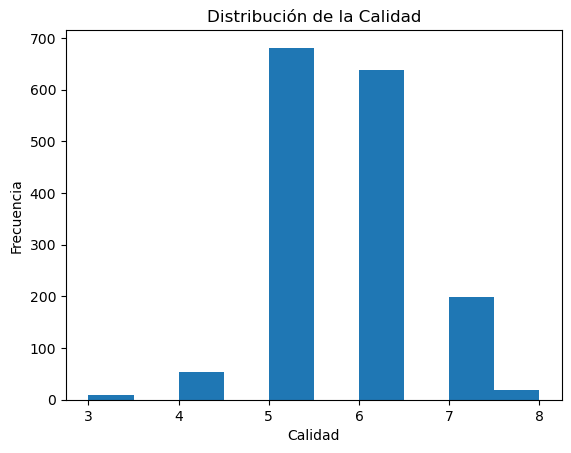

In [49]:
# Crear un histograma de la columna 'quality' del DataFrame 'data'.
# 'plt.hist()' se utiliza para visualizar la distribución de la variable 'quality',
# mostrando la frecuencia de cada valor en el rango de la calidad.
plt.hist(data.quality)

# Añadir un título al histograma para clarificar lo que se está mostrando.
plt.title('Distribución de la Calidad')

# Añadir etiquetas a los ejes para mayor claridad.
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')

# Mostrar el histograma en pantalla.
plt.show()

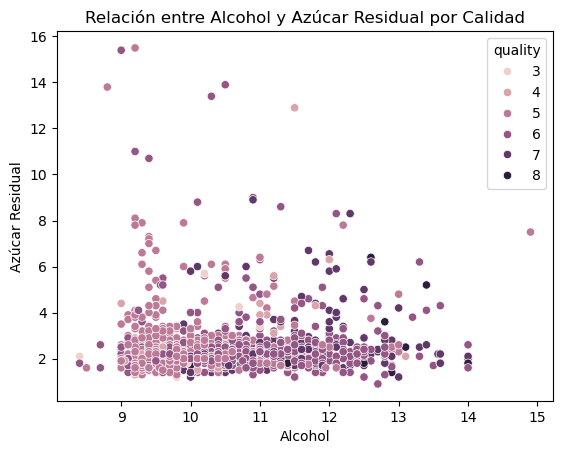

In [50]:
# Crear un diagrama de dispersión (scatter plot) utilizando seaborn para visualizar la relación
# entre 'alcohol' y 'residual sugar' en el DataFrame 'data'.
# El parámetro 'hue' se utiliza para colorear los puntos según la variable 'quality',
# lo que permite observar cómo varía la calidad con respecto a las otras dos variables.
sns.scatterplot(x="alcohol", y="residual sugar", hue="quality", data=data)

# Añadir un título al gráfico para mayor claridad.
plt.title('Relación entre Alcohol y Azúcar Residual por Calidad')

# Añadir etiquetas a los ejes para mayor comprensión.
plt.xlabel('Alcohol')
plt.ylabel('Azúcar Residual')

# Mostrar el gráfico en pantalla.
plt.show()

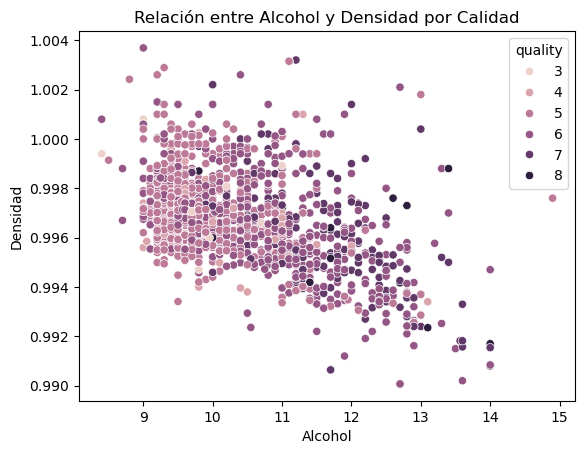

In [51]:
# Crear un diagrama de dispersión (scatter plot) utilizando seaborn para visualizar la relación
# entre 'alcohol' y 'density' en el DataFrame 'data'.
# El parámetro 'hue' se utiliza para colorear los puntos según la variable 'quality',
# lo que permite observar cómo varía la calidad con respecto a las otras dos variables.
sns.scatterplot(x="alcohol", y="density", hue="quality", data=data)

# Añadir un título al gráfico para mayor claridad.
plt.title('Relación entre Alcohol y Densidad por Calidad')

# Añadir etiquetas a los ejes para mayor comprensión.
plt.xlabel('Alcohol')
plt.ylabel('Densidad')

# Mostrar el gráfico en pantalla.
plt.show()

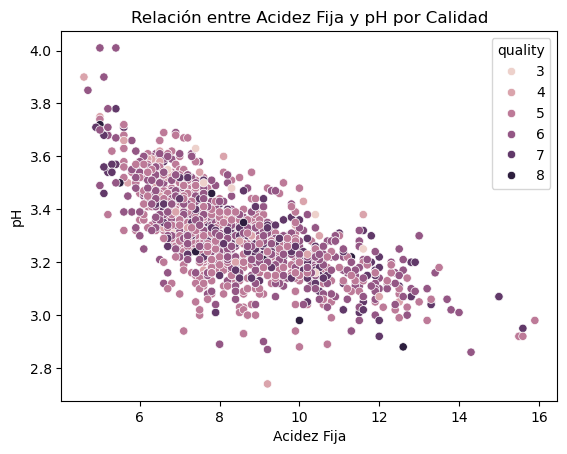

In [52]:
# Crear un diagrama de dispersión (scatter plot) utilizando seaborn para visualizar la relación
# entre 'fixed acidity' y 'pH' en el DataFrame 'data'.
# El parámetro 'hue' se utiliza para colorear los puntos según la variable 'quality',
# lo que permite observar cómo varía la calidad con respecto a las otras dos variables.
sns.scatterplot(x="fixed acidity", y="pH", hue="quality", data=data)

# Añadir un título al gráfico para mayor claridad.
plt.title('Relación entre Acidez Fija y pH por Calidad')

# Añadir etiquetas a los ejes para mayor comprensión.
plt.xlabel('Acidez Fija')
plt.ylabel('pH')

# Mostrar el gráfico en pantalla.
plt.show()

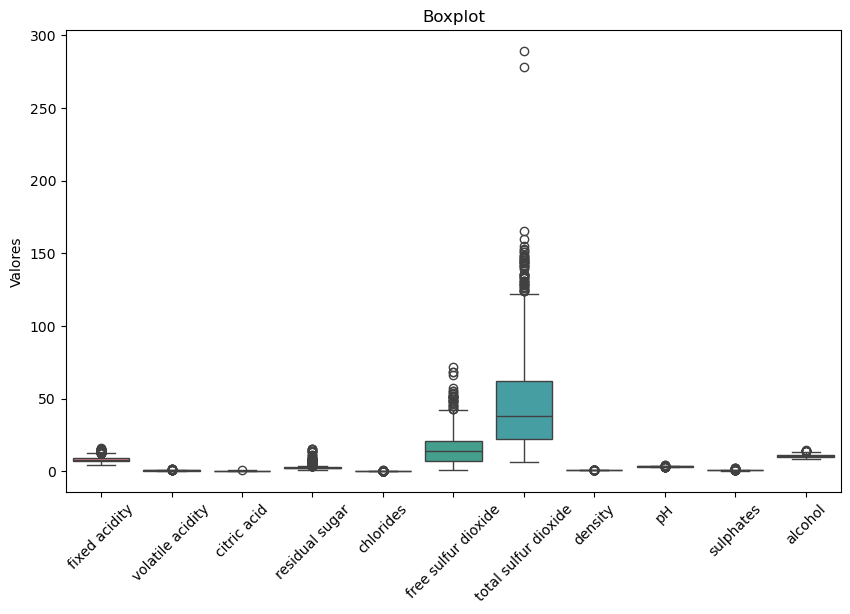

In [21]:
# Crear una figura de tamaño 10x6 pulgadas para el gráfico
plt.figure(figsize=(10, 6))

# Generar un boxplot de las columnas seleccionadas de la variable 'data'
# Esto permite observar la distribución y valores atípicos de varias características
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide', 
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

# Rotar las etiquetas del eje X 45 grados para evitar que se superpongan, 
# mejorando la legibilidad de los nombres de las variables
plt.xticks(rotation=45)

# Asignar un título al gráfico
plt.title('Boxplot')

# Etiquetar el eje Y como 'Valores' para mostrar que representa los valores numéricos de cada variable
plt.ylabel('Valores')

# Mostrar el gráfico en pantalla
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [15]:
# Calcular la media y la desviación estándar de la columna 'total sulfur dioxide'
media = data['total sulfur dioxide'].mean()
desviacion = data['total sulfur dioxide'].std()

# Calcular el rango superior e inferior usando 1.96 veces la desviación estándar
Rsuperior = media + desviacion * 1.96
Rinferior = media - desviacion * 1.96

# Crear una copia del DataFrame original para trabajar con ella
copydata = data.copy()

# Eliminar valores atípicos: aquellos que están por encima del límite superior
copydata = copydata.drop(copydata[copydata['total sulfur dioxide'] > Rsuperior].index)

# Eliminar valores atípicos: aquellos que están por debajo del límite inferior
copydata = copydata.drop(copydata[copydata['total sulfur dioxide'] < Rinferior].index)

# Mostrar el DataFrame sin los valores atípicos
copydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1513 non-null   float64
 1   volatile acidity      1513 non-null   float64
 2   citric acid           1513 non-null   float64
 3   residual sugar        1513 non-null   float64
 4   chlorides             1513 non-null   float64
 5   free sulfur dioxide   1513 non-null   float64
 6   total sulfur dioxide  1513 non-null   float64
 7   density               1513 non-null   float64
 8   pH                    1513 non-null   float64
 9   sulphates             1513 non-null   float64
 10  alcohol               1513 non-null   float64
 11  quality               1513 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 153.7 KB


In [53]:
# Mostrar la forma (dimensiones) del DataFrame 'copydata'.
# Esto devuelve una tupla que contiene el número de filas y columnas,
# lo que ayuda a entender el tamaño del conjunto de datos.
copydata.shape

(1513, 12)

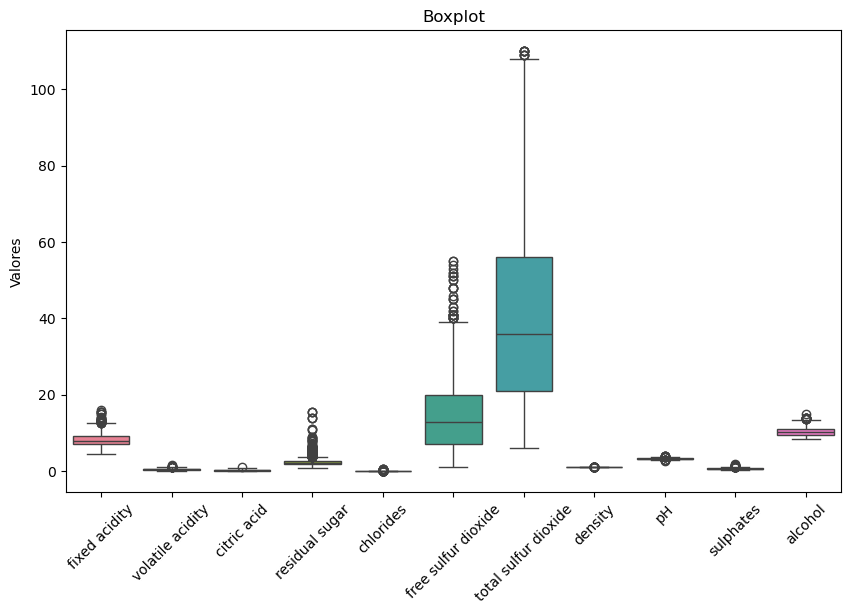

In [20]:
# Crear una figura con tamaño 10x6 pulgadas
plt.figure(figsize=(10, 6))

# Generar el boxplot para visualizar la distribución de varias columnas
# de copydata y detectar valores atípicos
sns.boxplot(data=copydata[['fixed acidity', 'volatile acidity', 'citric acid', 
                           'residual sugar', 'chlorides', 'free sulfur dioxide', 
                           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])

# Rotar las etiquetas del eje X 45 grados para mejor legibilidad
plt.xticks(rotation=45)

# Agregar un título al gráfico
plt.title('Boxplot')

# Etiquetar el eje Y para indicar que representa los valores numéricos de cada variable
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

In [26]:
# Definir las columnas que se utilizarán como variables predictoras en el modelo.
# Estas columnas contienen características químicas y físicas que pueden ayudar a
# predecir la calidad del vino.
predictors_col = ['fixed acidity', 'volatile acidity', 'citric acid', 
                  'residual sugar', 'chlorides', 'free sulfur dioxide', 
                  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Definir la columna objetivo que se desea predecir.
# En este caso, es la calidad del vino, que es la variable dependiente.
target_col = ['quality']

In [27]:
# Crear un DataFrame 'predictors' que contiene solo las columnas especificadas en 'predictors_col'
# de la variable 'copydata'. Estas columnas actuarán como las variables independientes (X) en el modelo.
predictors = copydata[predictors_col]

# Crear un DataFrame 'target' que contiene solo la columna especificada en 'target_col'
# de la variable 'copydata'. Esta columna será la variable dependiente (y) que queremos predecir.
target = copydata[target_col]

In [28]:
# Almacena las columnas seleccionadas en 'predictors_col' de 'copydata'
# en la variable 'predictors', para usarlas como las variables independientes.
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [29]:
# Almacena la columna especificada en 'target_col' de 'copydata'
# en la variable 'target', que representa la variable dependiente que se desea predecir.
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [30]:
# Calcular la matriz de correlación entre las variables predictoras.
# Esto permite observar la relación lineal entre cada par de variables en 'predictors',
# ayudando a identificar relaciones fuertes o colinealidades.
corr = predictors.corr()

# Mostrar la matriz de correlación calculada.
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.275070,0.687927,0.156904,0.092602,-0.147640,-0.119531,0.676551,-0.703478,0.198055,-0.059612
volatile acidity,-0.275070,1.000000,-0.569148,0.016109,0.052612,-0.024077,0.075327,0.001100,0.247122,-0.281556,-0.192261
citric acid,0.687927,-0.569148,1.000000,0.149420,0.210573,-0.083131,-0.016376,0.381697,-0.550524,0.344306,0.116681
residual sugar,0.156904,0.016109,0.149420,1.000000,0.062979,0.125880,0.135462,0.384021,-0.097781,0.023625,0.042182
chlorides,0.092602,0.052612,0.210573,0.062979,1.000000,-0.010818,0.064250,0.194597,-0.271019,0.399497,-0.219736
free sulfur dioxide,-0.147640,-0.024077,-0.083131,0.125880,-0.010818,1.000000,0.669547,-0.045858,0.110482,0.058020,-0.031042
total sulfur dioxide,-0.119531,0.075327,-0.016376,0.135462,0.064250,0.669547,1.000000,0.076918,0.021924,0.029043,-0.182757
density,0.676551,0.001100,0.381697,0.384021,0.194597,-0.045858,0.076918,1.000000,-0.362044,0.148162,-0.493046
pH,-0.703478,0.247122,-0.550524,-0.097781,-0.271019,0.110482,0.021924,-0.362044,1.000000,-0.175808,0.196962
sulphates,0.198055,-0.281556,0.344306,0.023625,0.399497,0.058020,0.029043,0.148162,-0.175808,1.000000,0.117216


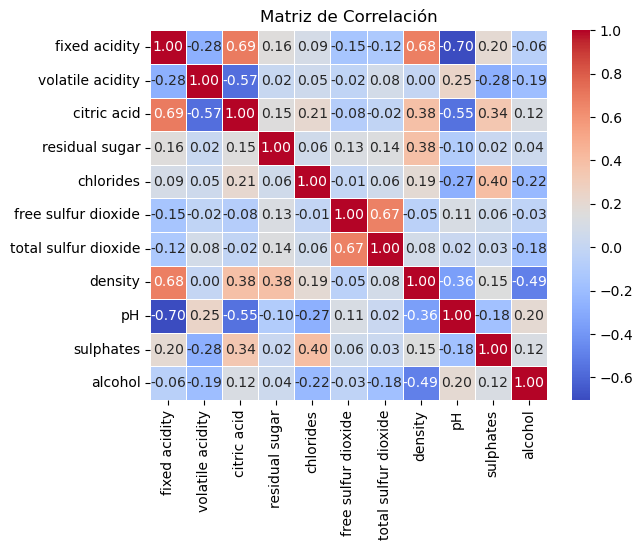

In [32]:
# Crear un mapa de calor (heatmap) de la matriz de correlación 'corr' usando seaborn.
# Esto proporciona una representación visual de las correlaciones entre las variables
# en 'predictors', donde los colores indican la fuerza y dirección de las relaciones.
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Añadir un título al mapa de calor.
plt.title('Matriz de Correlación')

# Mostrar el gráfico en pantalla.
plt.show()

# 5. Entrenar el modelo configurando los diferentes hiperparametro 

In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba.
# Se usa 'train_test_split' para dividir 'predictors' y 'target' en conjuntos de entrenamiento y prueba.
# 'test_size=0.2' asigna el 20% de los datos al conjunto de prueba y el 80% al de entrenamiento.
# 'random_state=13' asegura que la división sea reproducible.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [34]:
# Crear una instancia del clasificador de árbol de decisión.
# 'DecisionTreeClassifier' es un modelo de aprendizaje supervisado que se utilizará
# para clasificar los datos basándose en las características proporcionadas en 'X_train'.
tree = DecisionTreeClassifier()

In [35]:
# Ajustar el modelo de árbol de decisión a los datos de entrenamiento.
# 'fit' entrena el clasificador usando las características de 'X_train' y las etiquetas de 'y_train'.
arbol = tree.fit(X_train, y_train)

[Text(0.48443524843009805, 0.98, 'x[10] <= 10.25\ngini = 0.646\nsamples = 1210\nvalue = [8, 39, 487, 503, 161, 12]'),
 Text(0.2153382174727333, 0.94, 'x[1] <= 0.555\ngini = 0.544\nsamples = 627\nvalue = [7, 22, 367, 209, 21, 1]'),
 Text(0.10102456758841027, 0.9, 'x[9] <= 0.585\ngini = 0.575\nsamples = 281\nvalue = [1, 7, 129, 129, 14, 1]'),
 Text(0.043186074694282255, 0.86, 'x[10] <= 9.75\ngini = 0.49\nsamples = 98\nvalue = [0.0, 5.0, 63.0, 30.0, 0.0, 0.0]'),
 Text(0.02644045389445852, 0.82, 'x[4] <= 0.08\ngini = 0.396\nsamples = 71\nvalue = [0, 3, 53, 15, 0, 0]'),
 Text(0.014101575410377877, 0.78, 'x[3] <= 1.95\ngini = 0.544\nsamples = 33\nvalue = [0, 2, 18, 13, 0, 0]'),
 Text(0.007050787705188939, 0.74, 'x[1] <= 0.3\ngini = 0.381\nsamples = 17\nvalue = [0, 1, 13, 3, 0, 0]'),
 Text(0.0035253938525944693, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.010576181557783408, 0.7, 'x[1] <= 0.535\ngini = 0.24\nsamples = 15\nvalue = [0, 1, 13, 1, 0, 0]'),
 Text(0.0070507

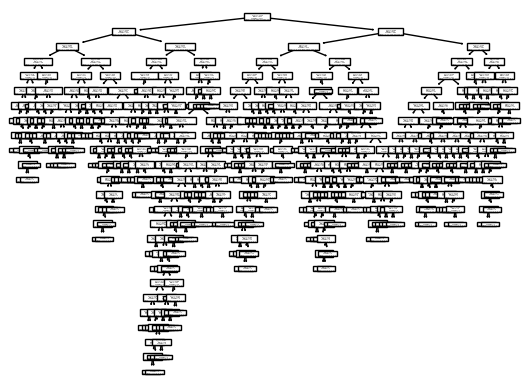

In [36]:
# Visualizar el árbol de decisión ajustado utilizando la función 'plot_tree'.
# Esto muestra la estructura del árbol, incluyendo nodos de decisión y hojas,
# facilitando la comprensión de cómo se toman las decisiones en el modelo.
plot_tree(arbol)

In [38]:
# Realizar predicciones utilizando el modelo de árbol de decisión ajustado.
# 'predict' genera las etiquetas de clase para el conjunto de prueba 'X_test',
# basándose en el aprendizaje del modelo durante el ajuste.
predicciones = arbol.predict(X_test)

In [39]:
# Mostrar las predicciones generadas por el modelo de árbol de decisión
# para el conjunto de prueba 'X_test'. Esta variable contiene las clases
# predichas para cada instancia en el conjunto de prueba.
predicciones

array([6, 7, 6, 5, 7, 7, 5, 6, 6, 7, 7, 6, 5, 6, 6, 6, 7, 5, 6, 7, 6, 6,
       6, 6, 7, 6, 5, 5, 5, 6, 6, 7, 6, 7, 6, 6, 6, 5, 7, 7, 7, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 7, 5, 7, 7, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 7, 5, 5, 7, 6, 6, 5, 5, 7,
       6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 4, 5, 7, 5, 7, 5, 6, 6, 5, 5,
       6, 7, 4, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6, 5, 5, 4, 6, 6, 5,
       5, 7, 6, 5, 5, 6, 7, 4, 6, 7, 6, 7, 5, 6, 6, 5, 7, 7, 6, 7, 5, 6,
       5, 6, 6, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6, 8, 5, 5, 5, 5, 6, 6, 7, 7,
       6, 6, 5, 7, 5, 6, 6, 4, 6, 5, 6, 6, 5, 5, 4, 6, 5, 6, 5, 6, 5, 7,
       7, 5, 5, 5, 7, 7, 6, 4, 6, 5, 5, 7, 6, 5, 7, 6, 7, 6, 5, 6, 5, 6,
       7, 5, 6, 6, 6, 7, 6, 6, 6, 5, 4, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 7, 5, 5, 5, 6, 6, 7, 7, 6, 6, 7, 7, 5, 5, 4, 4, 5, 6, 6, 6, 6,
       7, 5, 5, 6, 6, 5, 7, 5, 7, 5, 5, 5, 4, 6, 5, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 7, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 6,

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [40]:
# Crear una tabla de contingencia (crosstab) para comparar las etiquetas reales con las predicciones.
# 'np.array([y[0] for y in y_test.values.tolist()])' convierte las etiquetas reales del conjunto de prueba
# en un arreglo numpy. La tabla muestra la frecuencia de las clases reales (Actual) frente a las predicciones.
# Esto ayuda a evaluar el rendimiento del modelo.
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, 
            rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,1,1,0,0,0
4,1,6,3,2,0
5,7,74,30,8,0
6,2,24,84,17,1
7,0,1,9,26,0
8,0,1,2,3,0


In [41]:
# Calcular la precisión del modelo utilizando la función 'accuracy_score'.
# Esta función compara las etiquetas reales del conjunto de prueba 'y_test' 
# con las predicciones generadas y devuelve la proporción de predicciones correctas.
accuracy = accuracy_score(y_test, predicciones)

# Mostrar el valor de precisión calculado.
accuracy

0.6105610561056105

In [42]:
# Calcular la precisión del modelo utilizando la función 'precision_score'.
# La precisión se refiere a la proporción de verdaderos positivos sobre la suma de verdaderos positivos
# y falsos positivos. Se utiliza 'average='weighted'' para calcular la precisión ponderada,
# considerando el soporte de cada clase (es decir, el número de verdaderas instancias de cada clase).
precision = precision_score(y_test, predicciones, average='weighted')

# Mostrar el valor de precisión calculado.
precision

C:\Users\Hector Hernandez\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.607604819226916

In [43]:
# Calcular el recall del modelo utilizando la función 'recall_score'.
# El recall, también conocido como sensibilidad, es la proporción de verdaderos positivos
# sobre la suma de verdaderos positivos y falsos negativos. Se utiliza 'average='weighted''
# para calcular el recall ponderado, considerando el soporte de cada clase.
recall = recall_score(y_test, predicciones, average='weighted')

# Mostrar el valor de recall calculado.
recall

0.6105610561056105

In [44]:
# Calcular la puntuación F1 del modelo utilizando la función 'f1_score'.
# La puntuación F1 es la media armónica de la precisión y el recall, 
# proporcionando una única métrica que considera tanto los falsos positivos como los falsos negativos.
# Se utiliza 'average='weighted'' para calcular la puntuación F1 ponderada, 
# considerando el soporte de cada clase.
f1 = f1_score(y_test, predicciones, average='weighted')

# Mostrar el valor de la puntuación F1 calculada.
f1

0.6050181778470267

# 7. Interpretar, analizar y documentar los resultados obtenidos. 

## interpretación de resultados

En el análisis de datos se encontraron algunos datos como valores atípicos los cuales no fueron tenidos en cuenta en la muestra para el entrenamiento del algoritmo para tener un mejor entrenamiento del modelo, se redujo el número de datos iniciales de 1599 muestras a 1513. 
Luego de realizar el entrenamiento utilizando las columnas contienen características químicas y físicas para predecir la calidad del vino obtenemos los siguientes datos:

accuracy_score: 0.6105610561056105: 
Este valor mide cuántas de las predicciones del modelo fueron correctas en comparación con el total de muestras, para esta metrica tenemos una preccion del 61% en los valores acertados, lo que sugiere que el modelo podría necesitar mejoras.  

precision_score: 0.607604819226916: 
este valor 60% de precisión sugiere que el modelo tiene un desempeño medio  al identificar la clasificacion de vinos, Sin embargo, también implica que el 40% de la clasificacion de vinos que predicen no son realmente de esta clasificacion, lo cual podría ser un problema si los usuarios confían mucho en estas predicciones.
Nota:  algunas de las clases del conjunto de datos no tienen muestras predichas, lo que lleva a una precisión indefinida para esas clases. Esto suele ocurrir en problemas de clasificación con un conjunto de datos desequilibrado, donde algunas clases tienen muy pocas instancias en comparación con otras.    

recall_score: 0.6105610561056105:
Esto indica que el modelo es capaz de identificar correctamente el 61% de todas las clasificaciones de vinos que hay. En otras palabras, de cada 10 pruebas relizadas, el modelo logra detectar 6 demanra correcta, mientras que 4 de manera incorreta.

f1_score: 0.6050181778470267: 
Un puntaje F1 de 0.60 sugiere que, aunque el modelo es capaz de clasificaciones correctamente los vinos, también comete errores significativos. Esto puede implicar que el modelo tiene un buen número de verdaderos positivos, pero también puede haber un número considerable de falsos positivos o falsos negativos. 

Resumen general
    
Desempeño General : El modelo presenta un desempeño moderado con una precisión del 61% , lo que indica que hay una proporción considerable de predicciones correctas, pero también un número significativo de errores. La precisión y el recuerdo también reflejan esta tendencia, mostrando que el modelo puede ser efectivo en algunos casos, pero que necesita mejoras para manejar correctamente todas las categorías de vino.

Implicaciones Prácticas : En el contexto de la clasificación de vinos, los resultados indican que el modelo no es completamente confiable para realizar recomendaciones. Los usuarios podrían enfrentar problemas si confían demasiado en el modelo, especialmente si se presentan falsos positivos en las predicciones.

Áreas de Mejora : Es esencial revisar y ajustar el modelo para mejorar la precisión y el recuerdo, explorando estrategias como el reentrenamiento con más datos, el uso de técnicas de balanceo para abordar el problema de desequilibrio en las clases, y la optimización de los parámetros. del modelo.
